In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from google.colab import files
uploaded = files.upload()

Saving Netflix Dataset (12).csv to Netflix Dataset (12).csv


Once the file is uploaded, you can read it into a pandas DataFrame. Replace `"Netflix Dataset (12).csv"` with the actual name of your uploaded file if it's different.

In [24]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

  

In [25]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [26]:
print("First 5 rows of the dataset:")
print(df.head())

/tmp/ipython-input-3527994547.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)


In [28]:
df.dropna(subset=['Rating', 'Duration'], inplace=True)

df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

df['Release_Year'] = df['Release_Date'].dt.year

df.dropna(subset=['Release_Year'], inplace=True)

df['Release_Year'] = df['Release_Year'].astype(int)

In [29]:
print("\nDataset after cleaning:")
df.info()


Dataset after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 7684 entries, 0 to 7788
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7684 non-null   object        
 1   Category      7684 non-null   object        
 2   Title         7684 non-null   object        
 3   Director      7684 non-null   object        
 4   Cast          7684 non-null   object        
 5   Country       7684 non-null   object        
 6   Release_Date  7684 non-null   datetime64[ns]
 7   Rating        7684 non-null   object        
 8   Duration      7684 non-null   object        
 9   Type          7684 non-null   object        
 10  Description   7684 non-null   object        
 11  Release_Year  7684 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 780.4+ KB


In [30]:
plt.figure(figsize=(14, 7))

# For a clearer visualization, let's focus on years with a significant number of releases
year_counts = df['Release_Year'].value_counts()
significant_years = year_counts[year_counts > 10].index
df_filtered_years = df[df['Release_Year'].isin(significant_years)]

<Figure size 1400x700 with 0 Axes>

<Axes: xlabel='Release_Year', ylabel='count'>

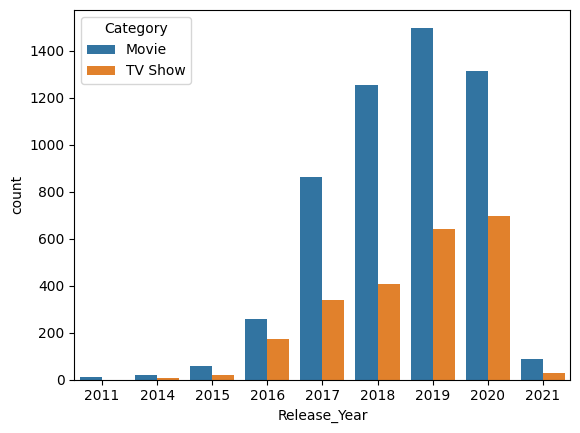

In [31]:
sns.countplot(x='Release_Year', hue='Category', data=df_filtered_years, order=sorted(significant_years))


/tmp/ipython-input-924243620.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Category')


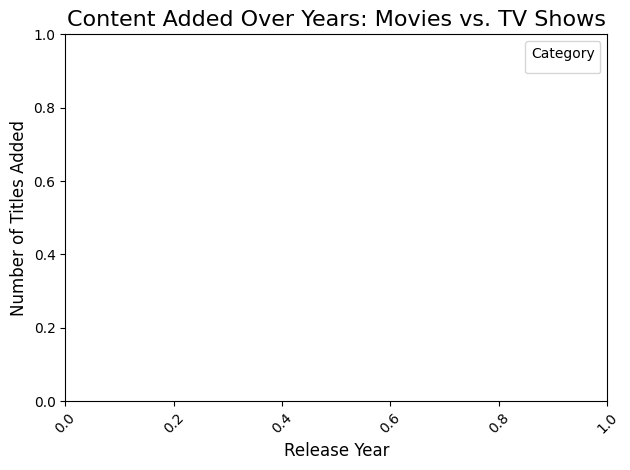

In [34]:
plt.title('Content Added Over Years: Movies vs. TV Shows', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()

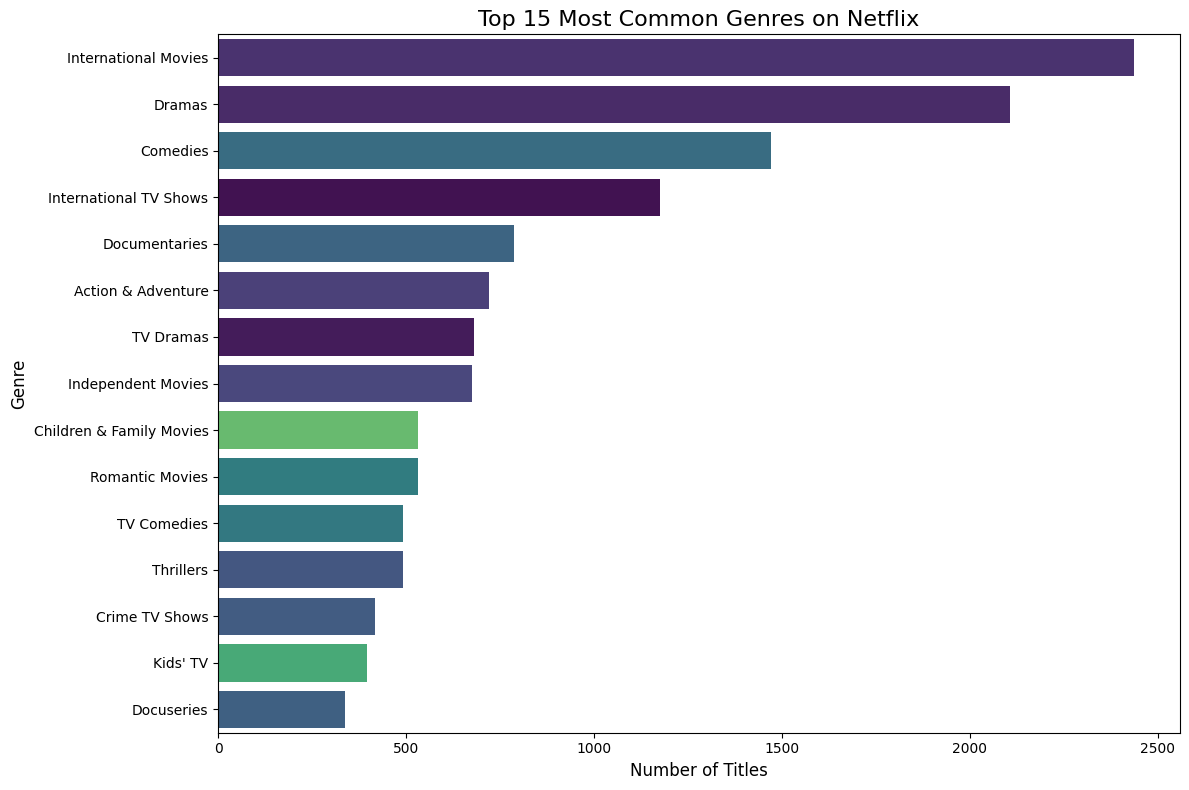

In [38]:
genres = df['Type'].str.split(', ').explode().reset_index(drop=True)

plt.figure(figsize=(12, 8))

sns.countplot(y=genres, order=genres.value_counts().iloc[:15].index, palette='viridis', hue=genres, legend=False)

plt.title('Top 15 Most Common Genres on Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()
plt.show() # Added plt.show() to display the plot

/tmp/ipython-input-905717895.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')


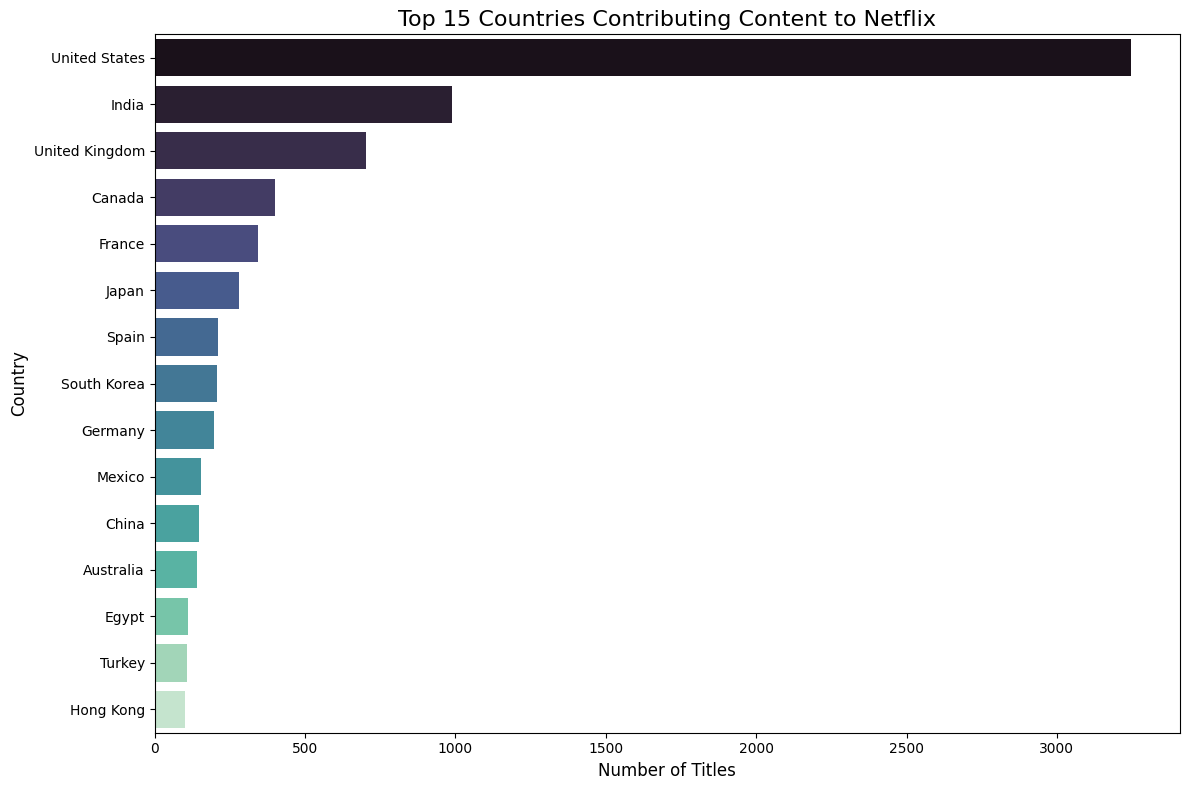

In [39]:
countries = df['Country'].str.split(', ').explode()

# Exclude entries where the country is 'Unknown' for a more meaningful chart
top_countries = countries[countries != 'Unknown'].value_counts().iloc[:15]

plt.figure(figsize=(12, 8))

sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')

plt.title('Top 15 Countries Contributing Content to Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()

/tmp/ipython-input-2105547924.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, order=df['Rating'].value_counts().index, palette='rocket')


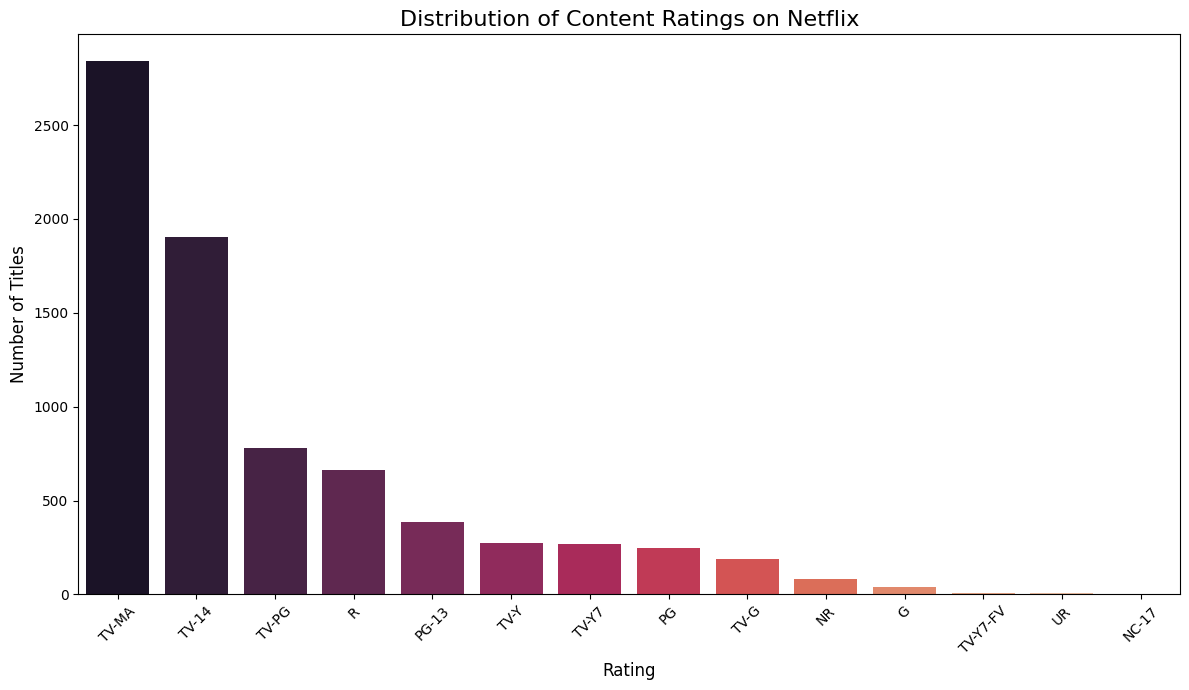

In [40]:
plt.figure(figsize=(12, 7))

# We'll use a countplot to see the frequency of each rating
sns.countplot(x='Rating', data=df, order=df['Rating'].value_counts().index, palette='rocket')

plt.title('Distribution of Content Ratings on Netflix', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

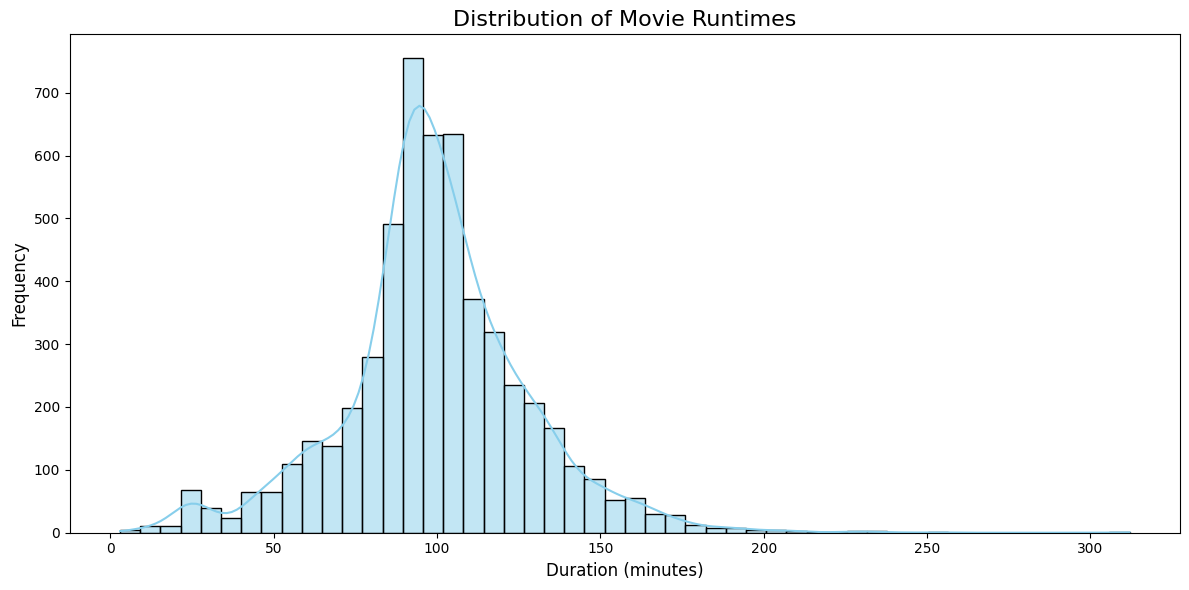

In [41]:
df_movies = df[df['Category'] == 'Movie'].copy()
df_tv_shows = df[df['Category'] == 'TV Show'].copy()

# --- Movie Duration Analysis ---
# Extract the numeric part of the 'Duration' column (e.g., '90 min' -> 90)
df_movies['Duration_min'] = df_movies['Duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(12, 6))
sns.histplot(df_movies['Duration_min'], bins=50, kde=True, color='skyblue')

plt.title('Distribution of Movie Runtimes', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()

/tmp/ipython-input-2291760907.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Seasons', data=df_tv_shows, order=df_tv_shows['Seasons'].value_counts().index, palette='magma')


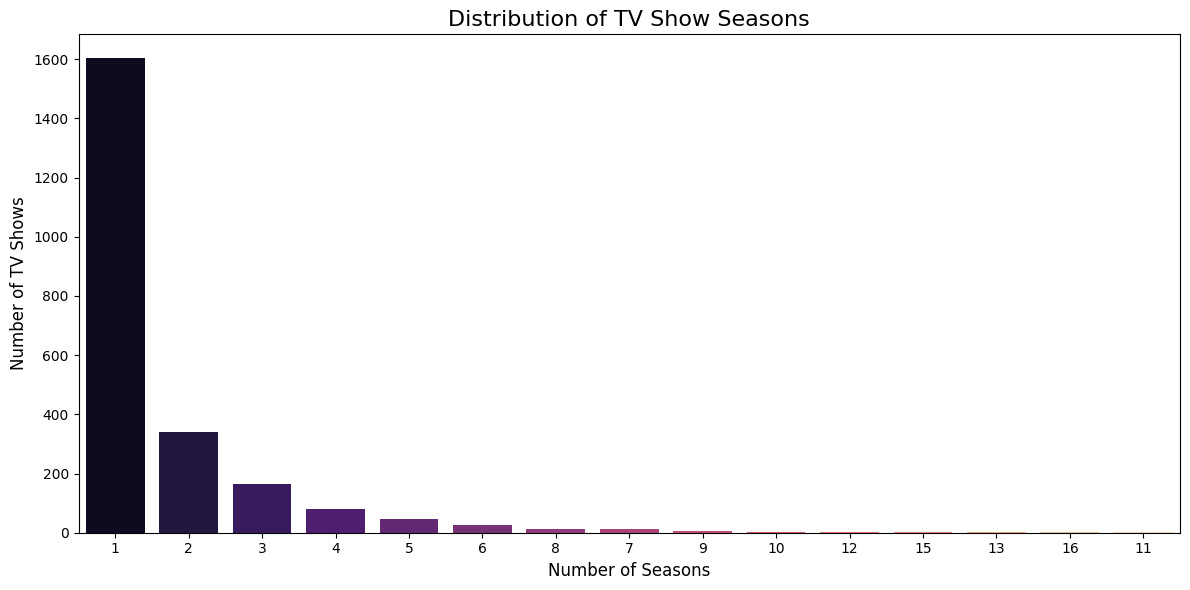

In [42]:

df_tv_shows['Seasons'] = df_tv_shows['Duration'].str.replace(' Season', '').str.replace('s', '').astype(int)

plt.figure(figsize=(12, 6))
sns.countplot(x='Seasons', data=df_tv_shows, order=df_tv_shows['Seasons'].value_counts().index, palette='magma')

plt.title('Distribution of TV Show Seasons', fontsize=16)
plt.xlabel('Number of Seasons', fontsize=12)
plt.ylabel('Number of TV Shows', fontsize=12)
plt.tight_layout()


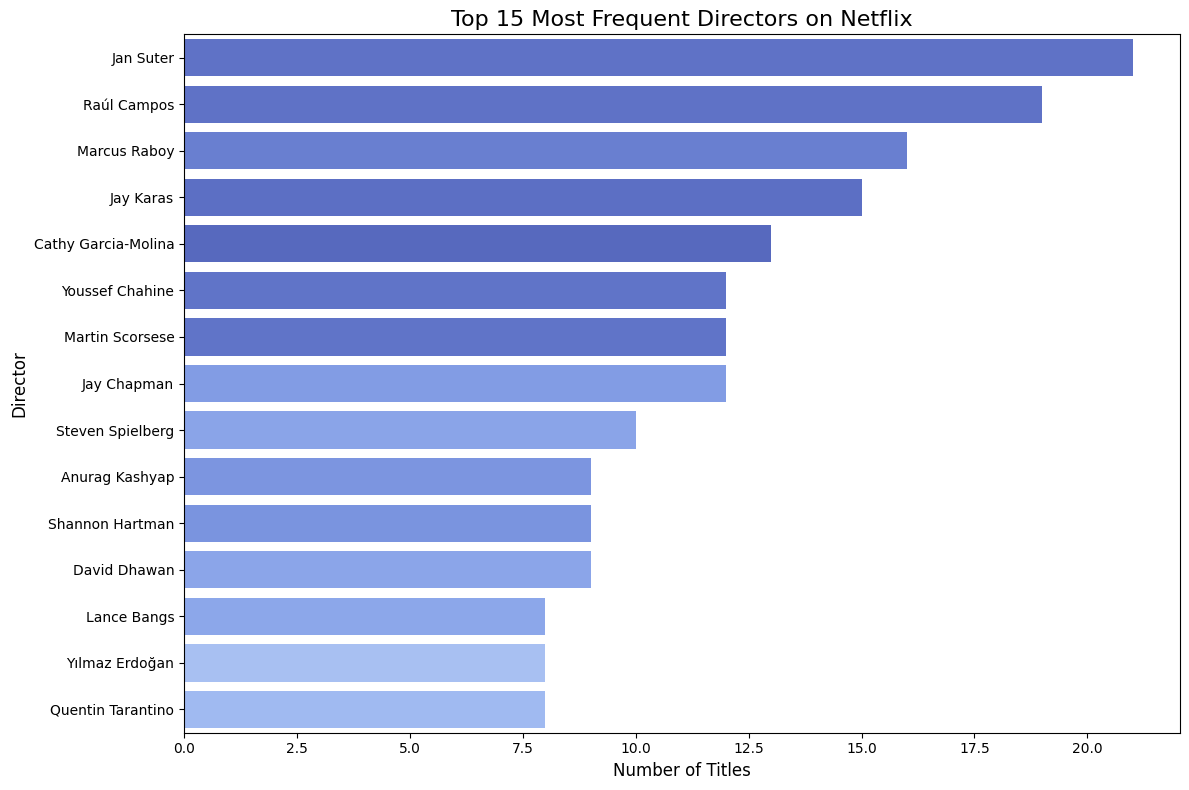

In [45]:
directors = df[df['Director'] != 'Unknown']['Director'].str.split(', ').explode().reset_index(drop=True)

plt.figure(figsize=(12, 8))
sns.countplot(y=directors, order=directors.value_counts().iloc[:15].index, palette='coolwarm')

plt.title('Top 15 Most Frequent Directors on Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.tight_layout()

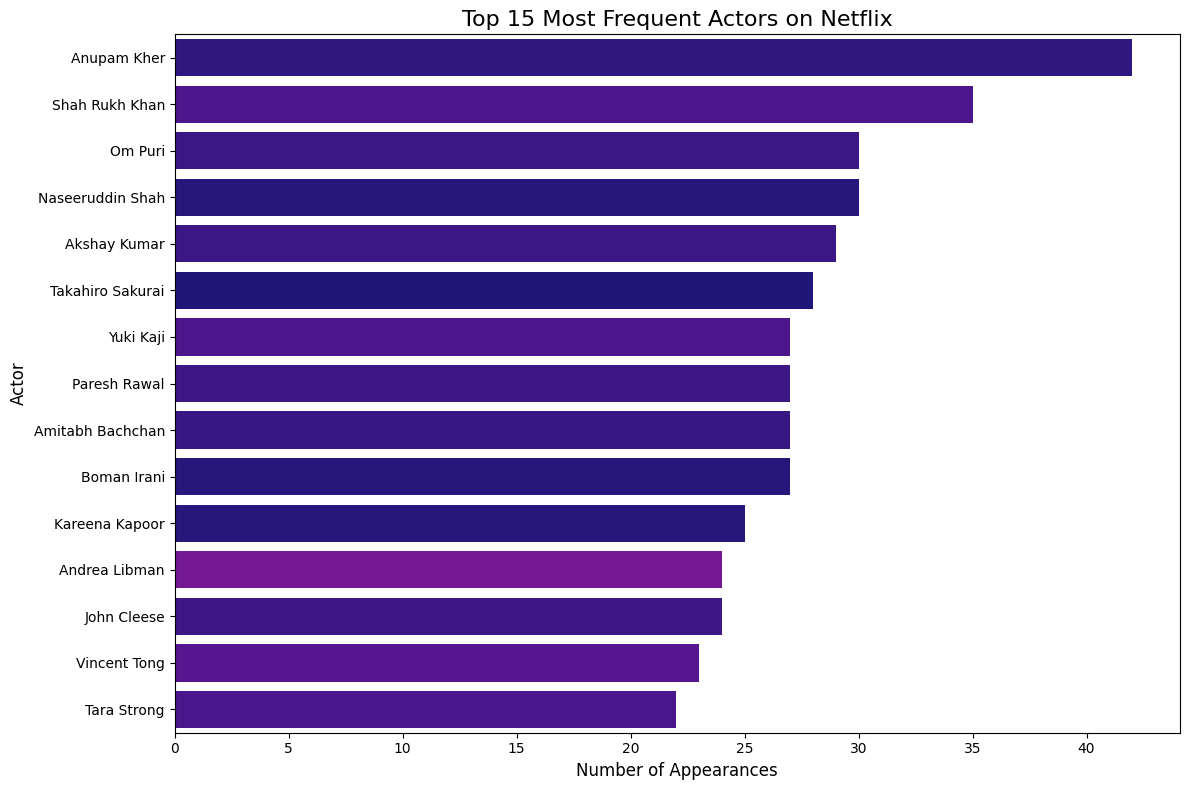

In [47]:
actors = df[df['Cast'] != 'Unknown']['Cast'].str.split(', ').explode().reset_index(drop=True)

plt.figure(figsize=(12, 8))
sns.countplot(y=actors, order=actors.value_counts().iloc[:15].index, palette='plasma', hue=actors, legend=False)

plt.title('Top 15 Most Frequent Actors on Netflix', fontsize=16)
plt.xlabel('Number of Appearances', fontsize=12)
plt.ylabel('Actor', fontsize=12)
plt.tight_layout()

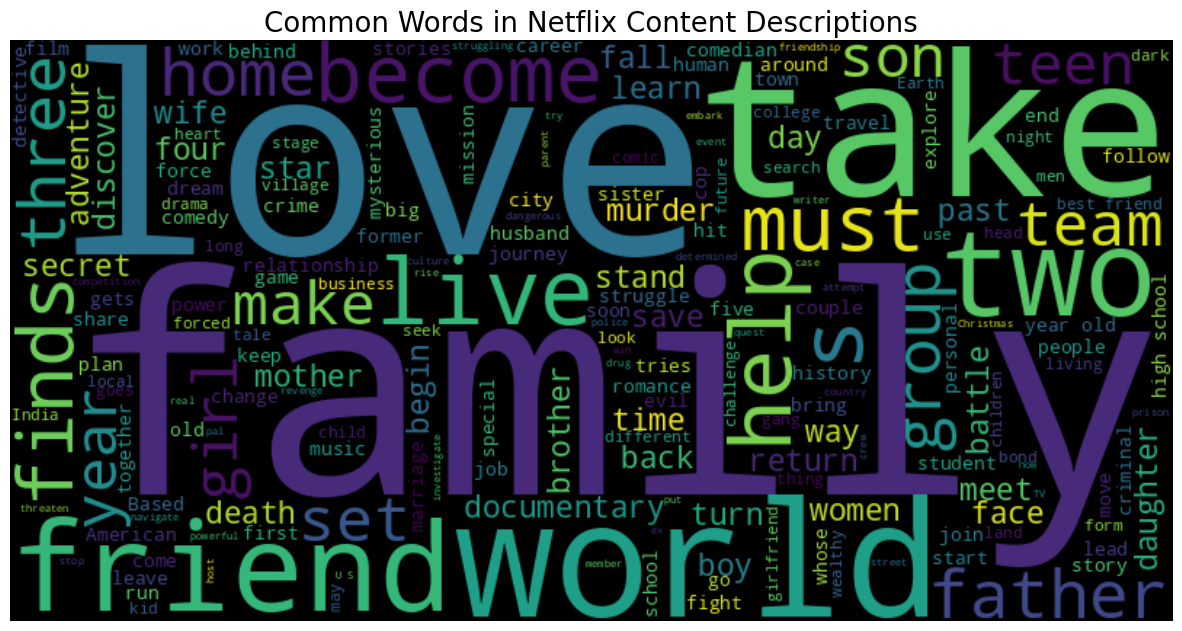

In [48]:
!pip install wordcloud

# Now, import the library and proceed with the analysis
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# --- Assuming 'df' is your cleaned DataFrame from the previous steps ---

# Combine all descriptions into a single string of text
text = ' '.join(df['Description'].dropna())

# Define some stopwords to exclude common but uninteresting words
stopwords = set(STOPWORDS)
stopwords.update(["show", "movie", "series", "life", "find", "one", "man", "woman", "new", "young", "will"])

# Generate the word cloud
wordcloud = WordCloud(
    stopwords=stopwords,
    background_color='black',
    width=800,
    height=400,
    colormap='viridis'
).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Hide the axes
plt.title('Common Words in Netflix Content Descriptions', fontsize=20)

# Save the plot to a file
plt.savefig('description_wordcloud.png')

plt.show()


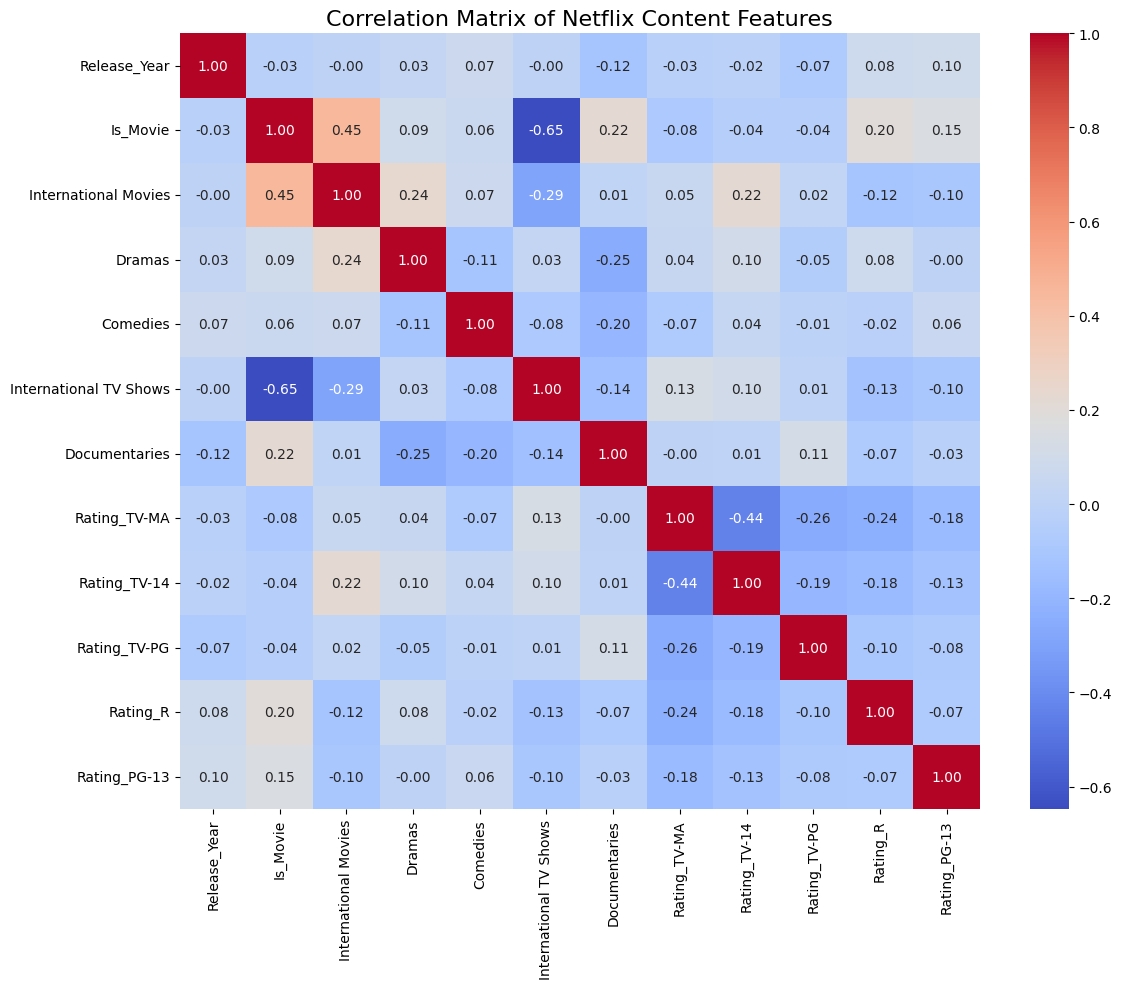

In [49]:
df_corr = df[['Release_Year']].copy()
df_corr['Is_Movie'] = (df['Category'] == 'Movie').astype(int)

# Now, let's create binary columns for the top 5 genres
top_genres = df['Type'].str.split(', ').explode().value_counts().nlargest(5).index
for genre in top_genres:
    df_corr[genre] = df['Type'].str.contains(genre).astype(int)

# And let's do the same for the top 5 ratings
top_ratings = df['Rating'].value_counts().nlargest(5).index
for rating in top_ratings:
    df_corr[f'Rating_{rating}'] = (df['Rating'] == rating).astype(int)

# Now we can create the correlation matrix
correlation_matrix = df_corr.corr()

# Finally, let's plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Netflix Content Features', fontsize=16)
plt.tight_layout()

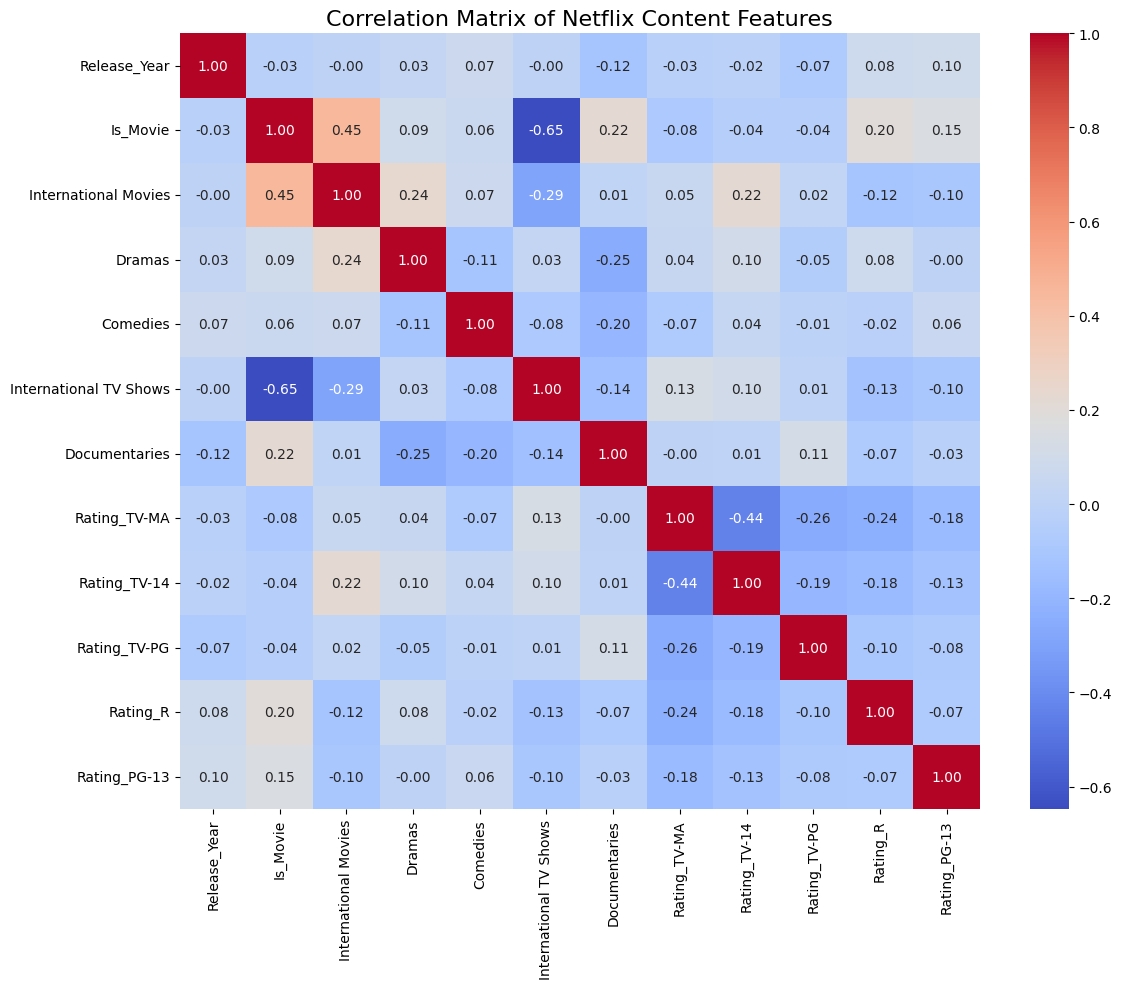

In [50]:
df_corr = df[['Release_Year']].copy()
df_corr['Is_Movie'] = (df['Category'] == 'Movie').astype(int)

# Now, let's create binary columns for the top 5 genres
top_genres = df['Type'].str.split(', ').explode().value_counts().nlargest(5).index
for genre in top_genres:
    df_corr[genre] = df['Type'].str.contains(genre).astype(int)

# And let's do the same for the top 5 ratings
top_ratings = df['Rating'].value_counts().nlargest(5).index
for rating in top_ratings:
    df_corr[f'Rating_{rating}'] = (df['Rating'] == rating).astype(int)

# Now we can create the correlation matrix
correlation_matrix = df_corr.corr()

# Finally, let's plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Netflix Content Features', fontsize=16)
plt.tight_layout()

Text(0.5, 1.0, 'Content Contribution by Top 5 Countries (and Others)')

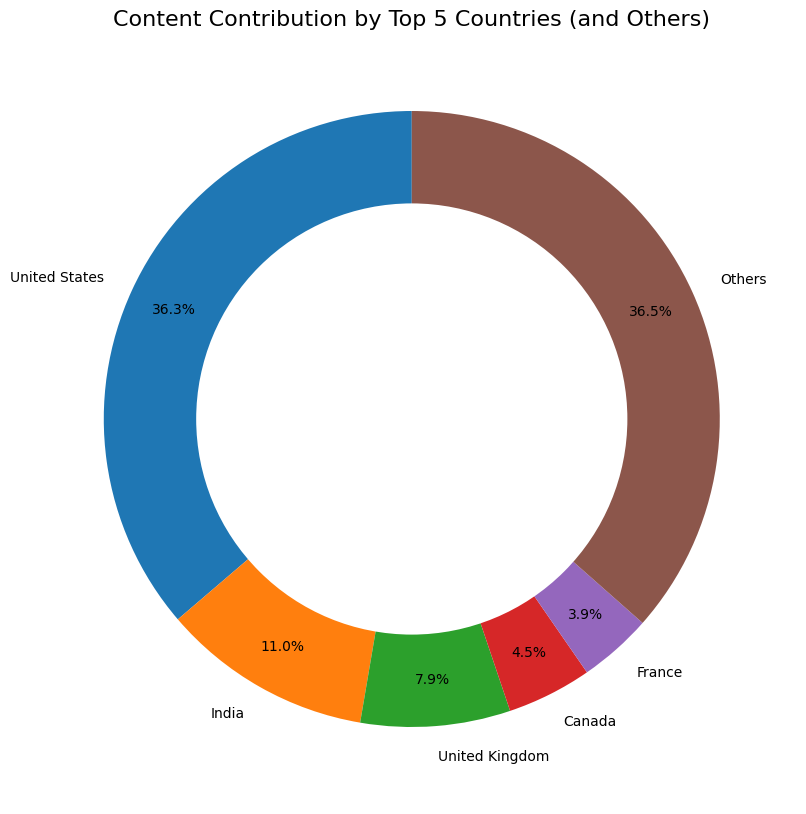

In [51]:
countries_counts = df[df['Country'] != 'Unknown']['Country'].str.split(', ').explode().value_counts()
top_5_countries = countries_counts.nlargest(5)
other_countries_sum = countries_counts.sum() - top_5_countries.sum()
top_5_countries['Others'] = other_countries_sum # Add 'Others' category

plt.figure(figsize=(10, 10))
plt.pie(top_5_countries, labels=top_5_countries.index, autopct='%1.1f%%',
        startangle=90, pctdistance=0.85)
# Draw a circle in the center to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Content Contribution by Top 5 Countries (and Others)", fontsize=16)

/tmp/ipython-input-2608920365.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Release_Month', data=df, order=month_order, palette='winter')


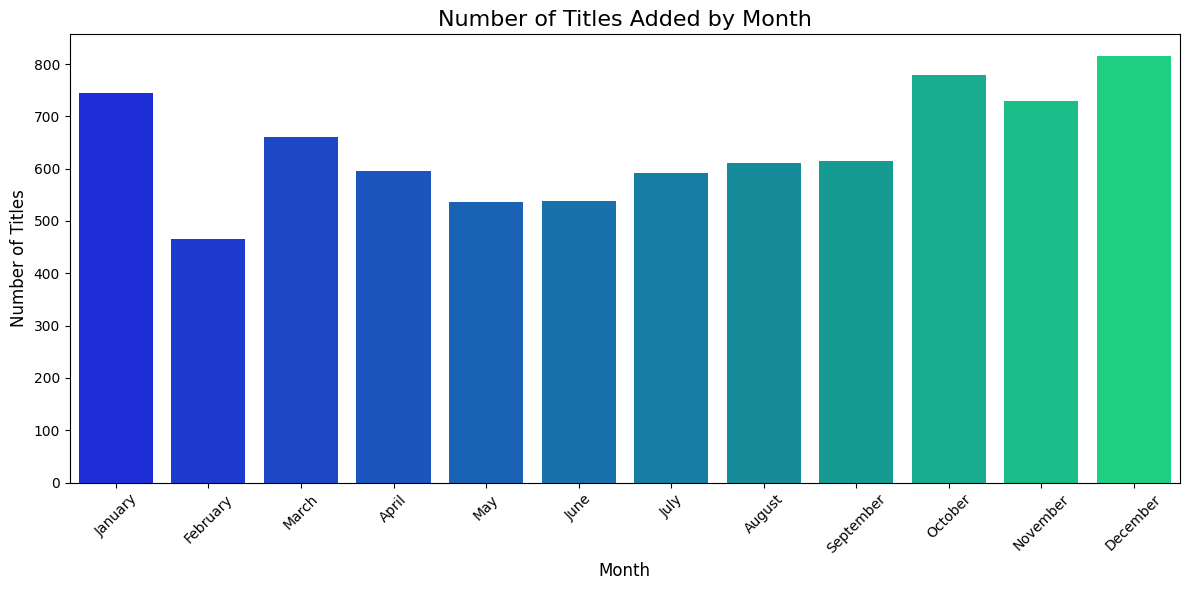

In [52]:
df['Release_Month'] = df['Release_Date'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 6))
sns.countplot(x='Release_Month', data=df, order=month_order, palette='winter')
plt.title('Number of Titles Added by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

/tmp/ipython-input-2155152102.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Release_Day', data=df, order=day_order, palette='spring')


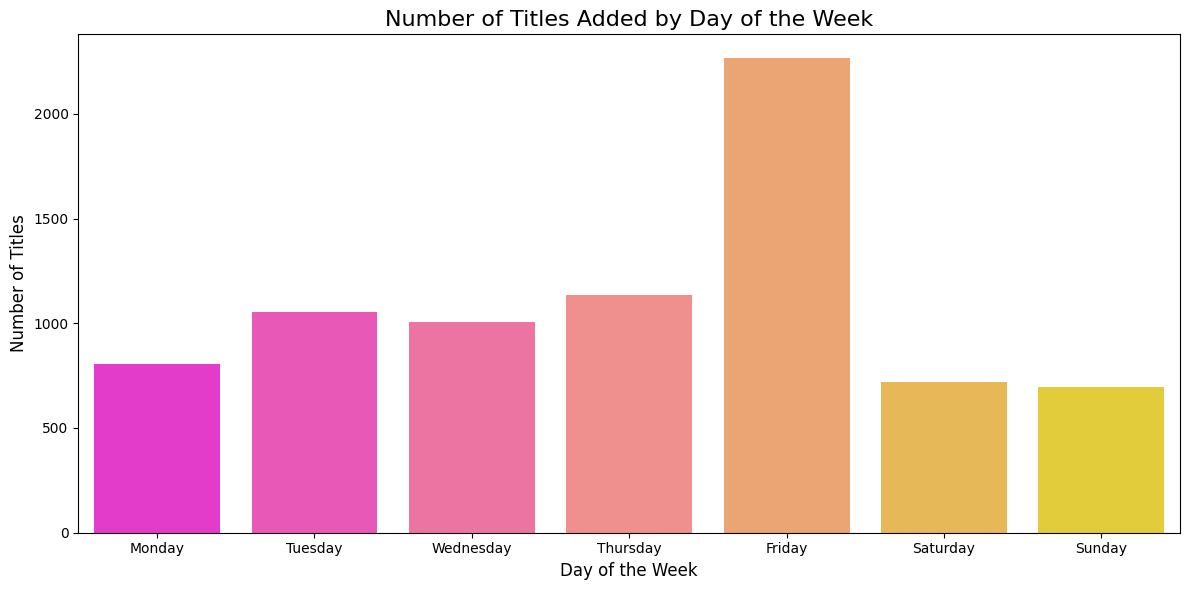

In [54]:
df['Release_Day'] = df['Release_Date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 6))
sns.countplot(x='Release_Day', data=df, order=day_order, palette='spring')
plt.title('Number of Titles Added by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.tight_layout()

# Final Project Summary

Based on the analysis, we have identified several key outcomes:

1.  **Content Strategy has shifted**: Our data clearly shows a pivot towards producing **original TV Shows**, especially since 2016.
2.  **Audience is Mature**: The most common rating is **TV-MA**, indicating a focus on an adult demographic.